In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import data into Python environment.
telecom_train_df = pd.read_csv('Comcast_telecom_complaints_data.csv')
telecom_train_df.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [14]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels
telecom_train_df['Month'] = pd.to_datetime(telecom_train_df['Date_month_year']).dt.month_name()
telecom_train_df['Day'] = pd.to_datetime(telecom_train_df['Date_month_year']).dt.day

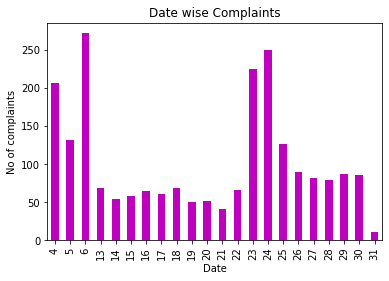

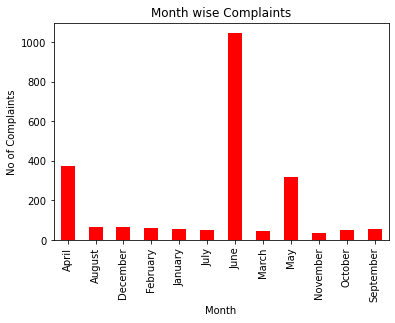

In [5]:

telecom_train_df.groupby('Day')['Customer Complaint'].count().plot(kind='bar', color='m')
plt.xlabel('Date')
plt.ylabel('No of complaints')
plt.title('Date wise Complaints')
plt.show()
telecom_train_df.groupby('Month')['Customer Complaint'].count().plot(kind='bar', color= 'r')
plt.xlabel('Month')
plt.ylabel('No of Complaints')
plt.title('Month wise Complaints')
plt.show()

In [6]:
# - Provide a table with the frequency of complaint types.
telecom_train_df['Customer Complaint'].str.lower().value_counts().to_frame().reset_index()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,consistent speed/connectivity with internet,1
1736,comcast fraud?,1
1737,questionable internet slowdown,1
1738,comcast (xfinity) internet service,1


In [7]:

# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

telecom_train_df['Customer Complaint'].str.lower().value_counts().head(1).to_frame()


,Customer Complaint
comcast,102


In [8]:
# Create a new categorical variable with value as Open and Closed. 
# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

telecom_train_df['New_status'] = telecom_train_df['Status'].apply(lambda x: 
                                                                  'Open' if ((x=='Open')|(x=='Pending')) else 'Closed')
telecom_train_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,New_status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Closed


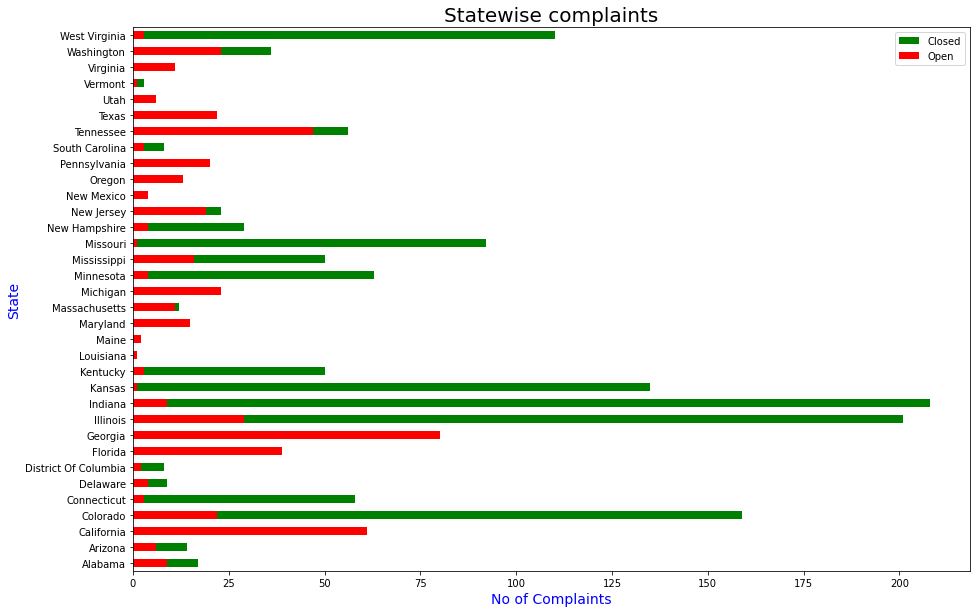

In [10]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
plt.figure(figsize=(15,10))
telecom_train_df[telecom_train_df['New_status']=='Closed'].groupby('State')['New_status'].count().plot(kind = 'barh', color='green')                                                                    
telecom_train_df[telecom_train_df['New_status']=='Open'].groupby('State')['New_status'].count().plot(kind = 'barh', color='red')

plt.ylabel('State',size = 14,color='blue')
plt.xlabel('No of Complaints',size = 14,color='blue')
plt.title('Statewise complaints',size = 20)
plt.legend(['Closed','Open'])
plt.show()

In [15]:
# Which state has the maximum complaints
print("The Maximum no of complaints in the state: \n" , telecom_train_df['State'].str.title().value_counts().head(1))

The Maximum no of complaints in the state: 
 Georgia    288
Name: State, dtype: int64


In [12]:
# Which state has the highest percentage of unresolved complaints

print("The highest percentage of unresolved complaints: \n" ,
      telecom_train_df[telecom_train_df['New_status']=='Open']['State'].str.title().value_counts(normalize=True).head(1))

The highest percentage of unresolved complaints: 
 Georgia    0.154739
Name: State, dtype: float64


In [13]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

print('The percentage of complaints resolved till date:\n',
      telecom_train_df[telecom_train_df['New_status']=='Closed']['Received Via'].value_counts(normalize=True))

The percentage of complaints resolved till date:
 Customer Care Call    0.506151
Internet              0.493849
Name: Received Via, dtype: float64
